# 4.10 Coding Etiquette & Excel Reporting

### This script contains the following points:
#### 1. Import libraries and dataframe
#### 2. Make a sample from the new dataframe
#### 3. Customer profiling-age group
#### 4. Customer profiling-income
#### 5. Customer profiling-department_id
#### 6. Customer profiling-number of dependents
#### 7. Customer profiling-order hour
#### 8. Customer profiling-order day

#### 1. Import libraries and dataframe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path and import dataframe
path = r'C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 8-12\2023-08-28 Instacart Basket Analysis'
ords_prods_cust_reg = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_region.pkl'))

In [3]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [4]:
# Output check
ords_prods_cust_reg.shape

(32404859, 37)

In [5]:
ords_prods_cust_reg.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,Spending_flag,median_days_order,frequency_flag,name,surname,gender,state,age,date_joined,dependants_number,fam_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity


In [6]:
ords_prods_cust_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 37 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            uint8   
 4   orders_day_of_week      uint8   
 5   order_hour_of_day       uint8   
 6   days_since_prior_order  float64 
 7   product_id              uint32  
 8   add_to_cart_order       int64   
 9   reordered               uint8   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           uint8   
 13  prices                  float64 
 14  _merge                  category
 15   price_range_loc        object  
 16  price_range_loc         object  
 17  busiest_day             object  
 18  busiest_days            object  
 19  busiest_period_of_day   object  
 20  max_order               uint8   
 21  loyalt

#### 2. Make a sample from the new dataframe

In [7]:
# Create a sample, split into two dataframes at a 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_reg)) <= 0.7

In [8]:
# Sample 70% of dataframe
big = ords_prods_cust_reg[dev]

In [9]:
# Sample 30% of dataframe
small = ords_prods_cust_reg[~dev]

In [10]:
# Check the results
len(ords_prods_cust_reg)

32404859

In [11]:
# Check the results
len(big) + len(small)

32404859

In [12]:
# Creating a new dataframe
sample_ords_prods_cust_reg = small

In [13]:
# Output check for the new dataframe
sample_ords_prods_cust_reg.shape

(9721098, 37)

In [14]:
# Create a copy of the DataFrame
sample_ords_prods_cust_reg_copy = sample_ords_prods_cust_reg.copy()

#### 3. Customer profiling-age group

In [15]:
# Create groups

result_age = [] 
for age in sample_ords_prods_cust_reg_copy['age']:
  if age >16 and age <=39:
    result_age.append('young adults')
  elif age <=59:
    result_age.append('middle-adge adults')
  elif age >=60:
    result_age.append('old adults')
  else:
    result_age.append('N/A')

In [16]:
# Add the 'age_group' column to the copy
sample_ords_prods_cust_reg_copy['age_group'] = result_age

In [17]:
# Output check
sample_ords_prods_cust_reg_copy.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,Spending_flag,median_days_order,frequency_flag,name,surname,gender,state,age,date_joined,dependants_number,fam_status,income,region,activity_flag,age_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults
6,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults
10,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,NaN,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults


In [18]:
# Output check for the new dataframe
sample_ords_prods_cust_reg_copy.shape

(9721098, 38)

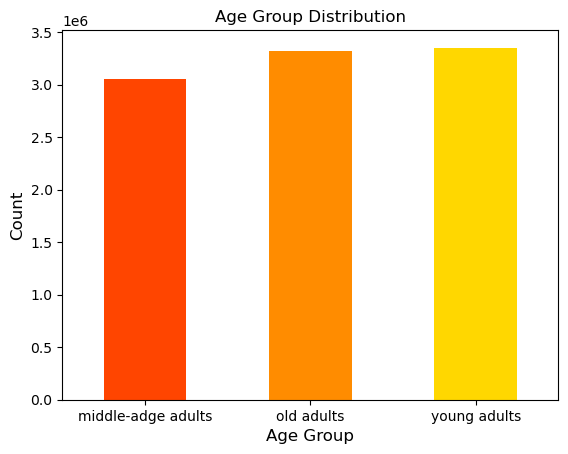

In [19]:
# Create colors palette
colors = ["orangered", "darkorange", "gold"]

# Create visualization for age_group with custom colors
bar_sample_age = sample_ords_prods_cust_reg_copy['age_group'].value_counts().sort_index().plot.bar(color=colors)

# Add labels and a title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Group Distribution', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the chart
plt.show()

In [20]:
# Export the visualization it outside
bar_sample_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sample_age.png'))

#### 4. Customer profiling-income

In [21]:
# Calculate descriptive statistics for the specified column
sample_ords_prods_cust_reg_copy['income'].describe()

count    9.721098e+06
mean     9.942981e+04
std      4.303434e+04
min      2.590300e+04
25%      6.700900e+04
50%      9.661800e+04
75%      1.278940e+05
max      5.939010e+05
Name: income, dtype: float64

In [22]:
# apply the dtype attribute
sample_ords_prods_cust_reg_copy['income'].dtypes

dtype('int64')

In [23]:
# Info
sample_ords_prods_cust_reg_copy['income'].info

<bound method Series.info of 0           40423
2           40423
3           40423
6           40423
10          40423
            ...  
32404841    53755
32404842    53755
32404843    53755
32404849    53755
32404850    53755
Name: income, Length: 9721098, dtype: int64>

In [24]:
# Create income groups
result_income = []

for income in sample_ords_prods_cust_reg_copy['income']:
    if pd.notna(income):
        if income > 1 and income <= 67009:
            result_income.append('low income')
        elif income <= 99430:
            result_income.append('middle income')
        elif income >= 99431:
            result_income.append('high income')
    else:
        result_income.append('N/A')

In [25]:
# Create a new column
sample_ords_prods_cust_reg_copy['income_group'] = result_income

In [26]:
# Check output
sample_ords_prods_cust_reg_copy.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,Spending_flag,median_days_order,frequency_flag,name,surname,gender,state,age,date_joined,dependants_number,fam_status,income,region,activity_flag,age_group,income_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults,low income
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults,low income
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults,low income
6,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults,low income
10,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,NaN,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,3 South,high activity,young adults,low income


In [27]:
sample_ords_prods_cust_reg_copy.shape

(9721098, 39)

In [28]:
# Check output
sample_ords_prods_cust_reg_copy['income_group'].value_counts(dropna = False)

income_group
high income      4515663
middle income    2775021
low income       2430414
Name: count, dtype: int64

#### 5. Customer profiling-department_id

In [29]:
# Importing department data
departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [30]:
# Column name change
departments.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [31]:
# Output check 
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [32]:
# Create a subset with specific columns
subset_cust_prof = sample_ords_prods_cust_reg_copy[['order_id','user_id','order_number','department_id','prices','orders_day_of_week', 'order_hour_of_day', 'age_group', 'income_group', 'dependants_number', 'fam_status', 'gender','region']]

In [33]:
# Output check
subset_cust_prof.head(20)

,order_id,user_id,order_number,department_id,prices,orders_day_of_week,order_hour_of_day,age_group,income_group,dependants_number,fam_status,gender,region
0,2539329,1,1,7,9.0,2,8,young adults,low income,3,married,Female,3 South
2,473747,1,3,7,9.0,3,12,young adults,low income,3,married,Female,3 South
3,2254736,1,4,7,9.0,4,7,young adults,low income,3,married,Female,3 South
6,550135,1,7,7,9.0,1,9,young adults,low income,3,married,Female,3 South
10,2539329,1,1,16,12.5,2,8,young adults,low income,3,married,Female,3 South
12,2398795,1,2,19,4.4,3,7,young adults,low income,3,married,Female,3 South
13,473747,1,3,19,4.4,3,12,young adults,low income,3,married,Female,3 South
19,2295261,1,9,19,4.4,1,16,young adults,low income,3,married,Female,3 South
21,2539329,1,1,19,4.7,2,8,young adults,low income,3,married,Female,3 South
22,2398795,1,2,19,4.7,3,7,young adults,low income,3,married,Female,3 South


In [34]:
# Assuming 'department_id' is the common column
subset_cust_prof_dep = departments.merge(subset_cust_prof, on='department_id', how='inner')

In [35]:
# Output check
subset_cust_prof_dep.head(20)

,department_id,department,order_id,user_id,order_number,prices,orders_day_of_week,order_hour_of_day,age_group,income_group,dependants_number,fam_status,gender,region
0,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South
1,1,frozen,1321974,19,1,5.2,6,13,old adults,high income,1,married,Female,3 South
2,1,frozen,2293453,19,2,5.2,5,14,old adults,high income,1,married,Female,3 South
3,1,frozen,2293453,19,2,1.1,5,14,old adults,high income,1,married,Female,3 South
4,1,frozen,2208892,19,3,1.1,0,14,old adults,high income,1,married,Female,3 South
5,1,frozen,1973799,19,5,1.1,6,12,old adults,high income,1,married,Female,3 South
6,1,frozen,532817,19,7,1.1,4,17,old adults,high income,1,married,Female,3 South
7,1,frozen,2808909,19,4,12.8,5,12,old adults,high income,1,married,Female,3 South
8,1,frozen,532817,19,7,12.8,4,17,old adults,high income,1,married,Female,3 South
9,1,frozen,1321974,19,1,4.2,6,13,old adults,high income,1,married,Female,3 South


In [36]:
# Create department_group variables that contain lists of strings from department list
Food = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned goods', 'deli','dry goods pasta', 'meat seafood', 'breakfast']
Household_and_Personal = ['household', 'personal care', 'babies', 'pets']
Other = ['missing', 'other', 'bulk', 'international', 'alcohol']

In [37]:
subset_cust_prof_dep['fam_status'].value_counts()

fam_status
married                             6828141
single                              1597458
divorced/widowed                     830182
living with parents and siblings     465317
Name: count, dtype: int64

#### 6. Customer profiling-number of dependents

In [38]:
# Create a groups for number of dependents and married stats
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'married') & (subset_cust_prof_dep['gender'] == 'Male') & (subset_cust_prof_dep['dependants_number'] > 1), 'dependants_status'] = 'married male with dependents'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'married') & (subset_cust_prof_dep['gender'] == 'Female') & (subset_cust_prof_dep['dependants_number'] > 1), 'dependants_status'] = 'married female with dependents'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'married') & (subset_cust_prof_dep['gender'] == 'Male') & (subset_cust_prof_dep['dependants_number'] == 1), 'dependants_status'] = 'married male without dependents'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'married') & (subset_cust_prof_dep['gender'] == 'Female') & (subset_cust_prof_dep['dependants_number'] == 1), 'dependants_status'] = 'married female without dependents'
# Create a groups for number of dependents and divorced/widowed
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'divorced/widowed') & (subset_cust_prof_dep['gender'] == 'Male') & (subset_cust_prof_dep['dependants_number'] > 1), 'dependants_status'] = 'divorced/widowed male with dependents'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'divorced/widowed') & (subset_cust_prof_dep['gender'] == 'Female') & (subset_cust_prof_dep['dependants_number'] > 1), 'dependants_status'] = 'divorced/widowed female with dependents'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'divorced/widowed') & (subset_cust_prof_dep['gender'] == 'Male') & (subset_cust_prof_dep['dependants_number'] == 0), 'dependants_status'] = 'divorced/widowed male without dependents'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'divorced/widowed') & (subset_cust_prof_dep['gender'] == 'Female') & (subset_cust_prof_dep['dependants_number'] == 0), 'dependants_status'] = 'divorced/widowed female without dependents'
# Create a groups for number of living with parents and siblings
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'living with parents and siblings') & (subset_cust_prof_dep['gender'] == 'Male') & (subset_cust_prof_dep['dependants_number'] > 2), 'dependants_status'] = 'male living with parenst or siblings'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'living with parents and siblings') & (subset_cust_prof_dep['gender'] == 'Female') & (subset_cust_prof_dep['dependants_number'] > 2), 'dependants_status'] = 'female living with parenst or siblings'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'living with parents and siblings') & (subset_cust_prof_dep['gender'] == 'Male') & (subset_cust_prof_dep['dependants_number'] == 1), 'dependants_status'] = 'male living with one parenst or sibling'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'living with parents and siblings') & (subset_cust_prof_dep['gender'] == 'Female') & (subset_cust_prof_dep['dependants_number'] == 1), 'dependants_status'] = 'female living with one parenst or sibling'
# Create a groups for number of single
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'single') & (subset_cust_prof_dep['gender'] == 'Male') & (subset_cust_prof_dep['dependants_number'] > 1), 'dependants_status'] = 'single male with dependents'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'single') & (subset_cust_prof_dep['gender'] == 'Female') & (subset_cust_prof_dep['dependants_number'] > 1), 'dependants_status'] = 'single female with dependents'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'single') & (subset_cust_prof_dep['gender'] == 'Male') & (subset_cust_prof_dep['dependants_number'] == 0), 'dependants_status'] = 'single male without dependents'
subset_cust_prof_dep.loc[(subset_cust_prof_dep['fam_status'] == 'single') & (subset_cust_prof_dep['gender'] == 'Female') & (subset_cust_prof_dep['dependants_number'] == 0), 'dependants_status'] = 'single female without dependents'

In [39]:
# Output check
subset_cust_prof_dep.head()

,department_id,department,order_id,user_id,order_number,prices,orders_day_of_week,order_hour_of_day,age_group,income_group,dependants_number,fam_status,gender,region,dependants_status
0,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South,married female without dependents
1,1,frozen,1321974,19,1,5.2,6,13,old adults,high income,1,married,Female,3 South,married female without dependents
2,1,frozen,2293453,19,2,5.2,5,14,old adults,high income,1,married,Female,3 South,married female without dependents
3,1,frozen,2293453,19,2,1.1,5,14,old adults,high income,1,married,Female,3 South,married female without dependents
4,1,frozen,2208892,19,3,1.1,0,14,old adults,high income,1,married,Female,3 South,married female without dependents


In [40]:
# Output check
subset_cust_prof_dep['dependants_status'].value_counts()

dependants_status
married male with dependents                  2292725
married female with dependents                2269425
married male without dependents               1146113
married female without dependents             1119878
single male without dependents                 807560
single female without dependents               789898
divorced/widowed female without dependents     418631
divorced/widowed male without dependents       411551
male living with one parenst or sibling         81399
male living with parenst or siblings            78859
female living with one parenst or sibling       77627
female living with parenst or siblings          74755
Name: count, dtype: int64

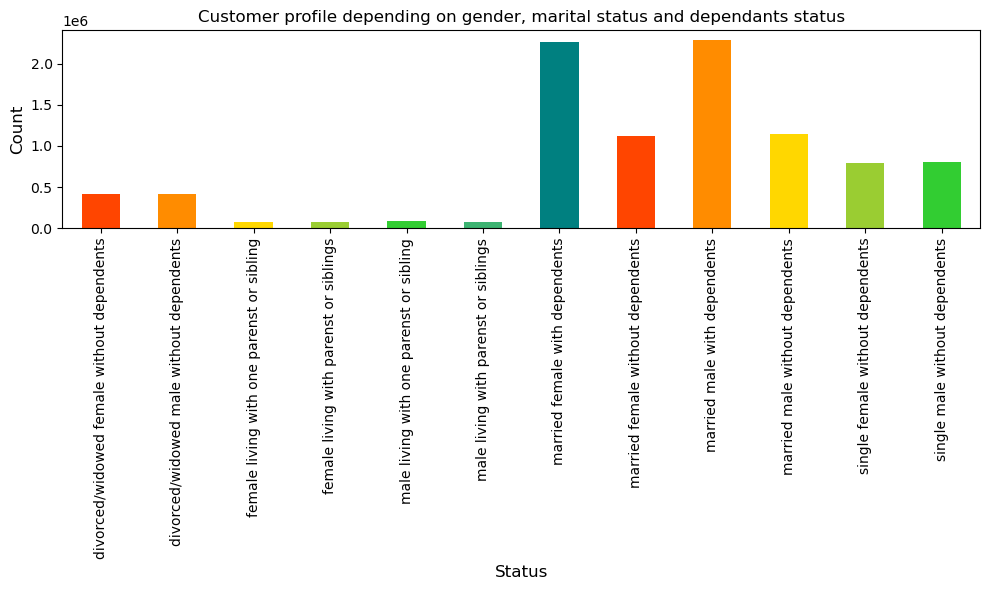

In [41]:
# Create colors palette
colors = ["orangered", "darkorange", "gold","yellowgreen", "limegreen", "mediumseagreen", "teal"]

fig, ax = plt.subplots(figsize=(10, 6))

# Create visualization for age_group with custom colors
subset_depend_bar = subset_cust_prof_dep['dependants_status'].value_counts().sort_index().plot.bar(color=colors)

# Add labels and a title
ax.set_xlabel('Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Customer profile depending on gender, marital status and dependants status', fontsize=12)

# Adjust the margins
plt.tight_layout()

In [42]:
# Save the figure using the bbox_inches='tight' argument
subset_depend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'subset_depend_bar.png'), bbox_inches='tight')

#### 7. Customer profiling-order hour

In [43]:
# Create a new list to store the hour groups
result_day_hour = []

# Iterate over the 'order_hour_of_day' column
for hour in subset_cust_prof_dep['order_hour_of_day']:
  # Check the value of the hour
  if hour > 0 and hour <= 5:
    # If the hour is between 0 and 5, append 'night' to the list
    result_day_hour.append('night')
  elif hour > 6 and hour <= 11:
    # If the hour is between 6 and 11, append 'morning' to the list
    result_day_hour.append('morning')
  elif hour > 12 and hour <= 17:
    # If the hour is between 12 and 17, append 'afternoon' to the list
    result_day_hour.append('afternoon')
  elif hour > 18 and hour <= 23:
    # If the hour is between 18 and 23, append 'evening' to the list
    result_day_hour.append('evening')
  else:
    # If the hour is not in any of the above ranges, append 'N/A' to the list
    result_day_hour.append('N/A')

In [44]:
# Add the 'order_hour_of_day' column to the copy
subset_cust_prof_dep['order_hour_of_day_group'] = result_day_hour

In [45]:
# Output check
subset_cust_prof_dep.head()

,department_id,department,order_id,user_id,order_number,prices,orders_day_of_week,order_hour_of_day,age_group,income_group,dependants_number,fam_status,gender,region,dependants_status,order_hour_of_day_group
0,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon
1,1,frozen,1321974,19,1,5.2,6,13,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon
2,1,frozen,2293453,19,2,5.2,5,14,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon
3,1,frozen,2293453,19,2,1.1,5,14,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon
4,1,frozen,2208892,19,3,1.1,0,14,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon


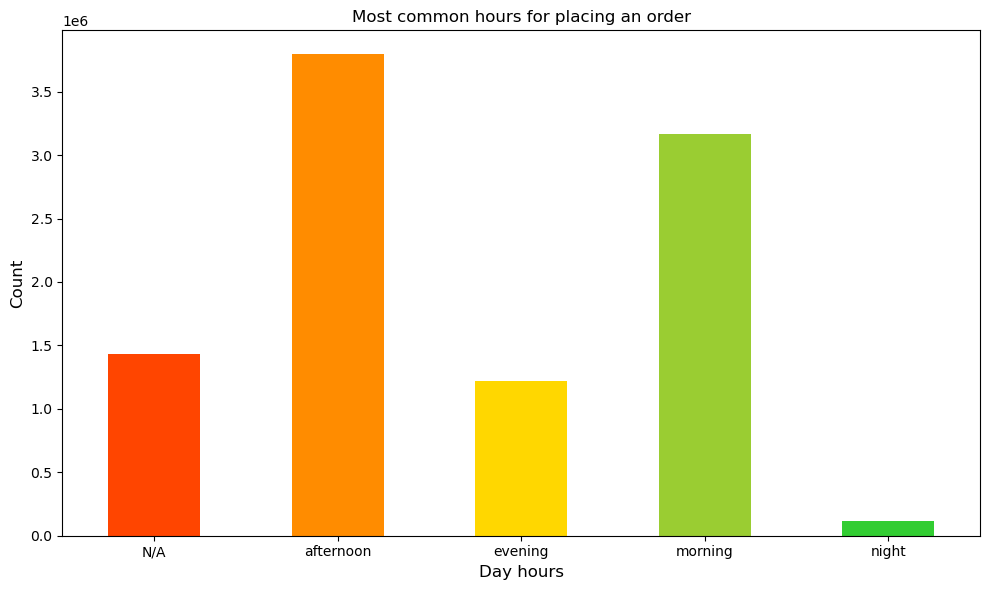

In [46]:
# Create colors palette
colors = ["orangered", "darkorange", "gold","yellowgreen", "limegreen", "mediumseagreen", "teal"]

fig, ax = plt.subplots(figsize=(10, 6))

# Create visualization for age_group with custom colors
subset_day_hour_bar = subset_cust_prof_dep['order_hour_of_day_group'].value_counts().sort_index().plot.bar(color=colors)

# Add labels and a title
ax.set_xlabel('Day hours', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Most common hours for placing an order', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Adjust the margins
plt.tight_layout()

In [47]:
# Save the figure using the bbox_inches='tight' argument
subset_day_hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'subset_day_hour_bar.png'), bbox_inches='tight')

#### 8. Customer profiling-order day

In [48]:
# Replacing the number with the name of the day in a new column
subset_cust_prof_dep.loc[subset_cust_prof_dep['orders_day_of_week'] == 0, 'day'] = 'Saturday'
subset_cust_prof_dep.loc[subset_cust_prof_dep['orders_day_of_week'] == 1, 'day'] = 'Sunday'
subset_cust_prof_dep.loc[subset_cust_prof_dep['orders_day_of_week'] == 2, 'day'] = 'Monday'
subset_cust_prof_dep.loc[subset_cust_prof_dep['orders_day_of_week'] == 3, 'day'] = 'Tuesday'
subset_cust_prof_dep.loc[subset_cust_prof_dep['orders_day_of_week'] == 4, 'day'] = 'Wednesday'
subset_cust_prof_dep.loc[subset_cust_prof_dep['orders_day_of_week'] == 5, 'day'] = 'Thursday'
subset_cust_prof_dep.loc[subset_cust_prof_dep['orders_day_of_week'] == 6, 'day'] = 'Friday'

In [49]:
# Check frequency 
subset_cust_prof_dep['day'].value_counts(dropna=False)

day
Saturday     1861978
Sunday       1696958
Friday       1349010
Monday       1264124
Thursday     1261706
Tuesday      1152498
Wednesday    1134824
Name: count, dtype: int64

In [50]:
# Output check
subset_cust_prof_dep.head()

,department_id,department,order_id,user_id,order_number,prices,orders_day_of_week,order_hour_of_day,age_group,income_group,dependants_number,fam_status,gender,region,dependants_status,order_hour_of_day_group,day
0,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday
1,1,frozen,1321974,19,1,5.2,6,13,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Friday
2,1,frozen,2293453,19,2,5.2,5,14,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday
3,1,frozen,2293453,19,2,1.1,5,14,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday
4,1,frozen,2208892,19,3,1.1,0,14,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Saturday


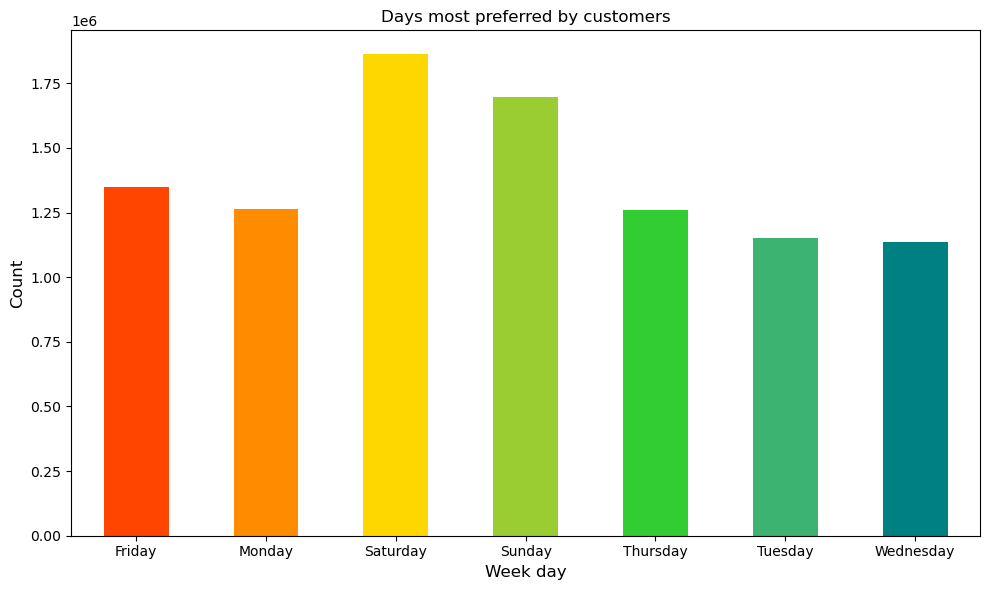

In [51]:
# Create colors palette
colors = ["orangered", "darkorange", "gold","yellowgreen", "limegreen", "mediumseagreen", "teal"]

fig, ax = plt.subplots(figsize=(10, 6))

# Create visualization for age_group with custom colors
subset_week_day_bar = subset_cust_prof_dep['day'].value_counts().sort_index().plot.bar(color=colors)

# Add labels and a title
ax.set_xlabel('Week day', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Days most preferred by customers', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Adjust the margins
plt.tight_layout()

In [52]:
# Save the figure using the bbox_inches='tight' argument
subset_week_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'subset_week_day_bar.png'), bbox_inches='tight')

In [53]:
# Export dataframe for Customer profiling - subset
subset_cust_prof_dep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'cust_prof_dep_groups.pkl'))

In [54]:
# Export dataframe
ords_prods_cust_reg.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_cust_prof.pkl'))